- <a href="#acute_or_chronic">acute_or_chronic</a><br>
- <a href="#diagnoses">diagnosis</a><br>
- <a href="#labs">Labs</a><br>
- <a href="#pacemaker">pacemaker</a><br>
- <a href="#duration">duration</a><br>
- <a href="#"></a><br>

Load the data frame for EDA using %load Pipeline_clean.py

In [115]:
# %load Pipeline_clean.py
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from data_merge import *
from Clean_Fun import *

# NOTE have to use remove_invalid_rows() inside ALex's function,
# before we remove patient name
# %% Load dataset

live_path='Data/Cardiac Program_M.xlsx'
archive_path='Data/Cardiac Program_Archive.xlsx'
live_sheet_pkl='pickle_jar/live_sheets.pkl'
archive_sheet_pkl='pickle_jar/archive_sheets.pkl'
datecol_pkl='pickle_jar/datecols.pkl'
df = sheet_merge(live_path, archive_path,
    live_sheet_pkl, archive_sheet_pkl, datecol_pkl)
# %% test patients, determing Response Value

# NOTE have to remove invalid rows
df['outcome']=df.apply(lambda row: determine_outcome(row['status'],row['discharge'],row['discharge_date']),axis=1)
train_df,test_df=train_test_split_sg(df)
df=train_df.copy() # for now
del test_df

# %% Clean effusion rate

df['ef']=df['ef'].apply(lambda x: clean_EF_rows(x))

# Clean Blood Pressure rows
df['diastolic']=df.apply(lambda row: clean_diastolic_columns(
    row['diastolic'],row['resting_bp'],col_type='di'),axis=1)
df['systolic']=df.apply(lambda row: clean_diastolic_columns(
    row['systolic'],row['resting_bp'],col_type='sys'),axis=1)

# Dummify the diagnoses
uniq_diag=find_unique_diag(df.diagnosis_1)
dummy_df_diag=dummify_diagnoses(df,uniq_diag,diagnosis_col='diagnosis_1')
df.drop('diagnosis_1',axis=1,inplace=True)
dummy_df_diag.columns=pd.Series(uniq_diag).apply(lambda x: remove_paren(x)).append(pd.Series('enrollId'))
df=df.merge(dummy_df_diag,on='enrollId',how="inner")

# clean HR
df['resting_hr']=df.resting_hr.apply(lambda x: hand_dates(x))

# Clean Meds and aicd
# acute or chronic
med_aicd_clean(df,'ace', 0)
med_aicd_clean(df,'bb', 0)
med_aicd_clean(df,'diuretics', 0)
med_aicd_clean(df,'anticoagulant', 0)
med_aicd_clean(df,'ionotropes', 0)
med_aicd_clean(df,'aicd', 0)

# weight_dur_age_clean(df,dur_na=9999,age_na=9999,weight_perc_cutoff=0.2)
df['duration']=df.apply(lambda row: find_duration(row['discharge'],
    row['enrollment_date'],row['discharge_date']),axis=1)
df['age'] = df['date_of_birth'].apply(find_age)
df['weight_change_since_admit'] = df.apply(lambda row: clean_weight_change(
    row['weight'],row['weight_change_since_admit']),axis=1)

remove_invalid_rows(df)

df.loc[df['duration']==9999, 'duration'] = None
df.loc[df['age']==9999, 'age'] = None

# %%
pd.set_option('display.max_columns', 60)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.columns = [x.replace(" ", "_") for x in df.columns]
df = drop_date_cols(df)
df

df.to_csv('Data/clean_test.csv')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Live Sheet:
Sheet name: "patients"
Retained columns: ['patient_link', 'date_of_birth', 'patient_gender', 'ef', 'special_status']

Sheet name: "patient_enrollment_records"
Retained columns: ['patient_link', 'facilities_link', 'enrollment_date', 'hospital_discharged_from', 'admit_weight', 'diagnosis_1', 'acute_or_chronic', 'aicd', 'status', 'discharge', 'discharge_date', 'cardiac_related', 'create_user']

Sheet name: "patient weights"
Retained columns: ['patient_link', 'name', 'patient_weight_date', 'weight', 'this_weight_change', 'weight_change_since_admit']

Sheet name: "patient BNP"
Retained columns: ['patient_link', 'bnp_date', 'bnp', 'this_bnp_change']

Sheet name: "Cardiac_Meds"
Retained columns: ['patient_link', 'cardiac_meds_date', 'ace', 'bb', 'diuretics', 'anticoagulant', 'ionotropes', 'other cardiac meds']

Sheet name: "patient labs"
Retained columns: ['patient_link', 'labs_date', 'bun', 'c

num missing 240
value counts before zero and one assignment: 0                                                      240
lisinopril 5mg qd                                       27
none                                                    25
lisinopril 2.5mg qd                                     17
losartan 50mg qd                                        12
losartan 25mg qd                                         9
lisinopril 10mg qd                                       9
lisinopril 20mg qd                                       9
losartan 100mg qd                                        6
losartan potassium oral tablet 50 mg qd                  5
enalapril 5mg qd                                         5
enalapril 10mg qd                                        4
lisinopril                                               3
enalapril 20mg qd                                        3
lisinopril 5mg bid                                       3
losartan 50mg                                         

In [110]:
from dtypeFun import *

In [107]:
import pickle

In [114]:
read_pkl(path)

{'datetimes': ['date_of_birth'],
 'numeric': ['ef',
  'admit_weight',
  'weight',
  'this_weight_change',
  'weight_change_since_admit',
  'bnp',
  'this_bnp_change',
  'bun',
  'cr',
  'sodium',
  'potasium',
  'mg',
  'this_cr_change',
  'resting_hr',
  'systolic',
  'diastolic',
  'duration',
  'age'],
 'categorical': ['patient_link',
  'patient_gender',
  'special_status',
  'facilities_link',
  'hospital_discharged_from',
  'acute_or_chronic',
  'aicd',
  'status',
  'discharge',
  'cardiac_related',
  'create_user',
  'enrollId',
  'name',
  'ace',
  'bb',
  'diuretics',
  'anticoagulant',
  'ionotropes',
  'other_cardiac_meds',
  'resting_bp',
  'outcome',
  'cad/mi',
  'heart_failure_unspecfied',
  'diastolic_heart_failure',
  'systolic_chf',
  'atrial_fibrilation',
  'cardiomyoapthy',
  'lvad',
  'chf']}

In [118]:
path = "pickle_jar/columnDtypes.pkl"
columnFormater(df, path)

['date_of_birth'] columns set to datetime
['ef', 'admit_weight', 'weight', 'this_weight_change', 'weight_change_since_admit', 'bnp', 'this_bnp_change', 'bun', 'cr', 'sodium', 'potasium', 'mg', 'this_cr_change', 'resting_hr', 'systolic', 'diastolic', 'duration', 'age'] columns set to numeric


In [119]:
df.describe()

,ef,admit_weight,aicd,discharge,weight,this_weight_change,weight_change_since_admit,bnp,this_bnp_change,ace,bb,diuretics,anticoagulant,ionotropes,bun,cr,sodium,potasium,mg,this_cr_change,resting_hr,systolic,diastolic,outcome,cad/mi,heart_failure_unspecfied,diastolic_heart_failure,systolic_chf,atrial_fibrilation,cardiomyoapthy,lvad,chf,duration,age
count,333.000000,370.000000,457.000000,457.000000,457.000000,457.000000,445.000000,457.000000,445.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.00000,192.000000,456.000000,409.000000,425.000000,449.000000,450.000000,448.000000,457.000000,457.000000,457.00000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,438.000000,449.000000
mean,0.499895,167.778622,0.091904,0.995624,169.003851,-0.664376,0.180045,830.555799,-141.530315,0.413567,0.713348,0.645514,0.739606,0.087527,35.787746,1.65860,140.296875,4.481360,2.087433,2.752094,77.826281,128.753333,71.444196,0.560175,0.227571,0.28884,0.140044,0.308534,0.277899,0.054705,0.004376,0.002188,50.417808,75.792873
std,0.565917,55.421040,0.289207,0.066082,55.068695,22.322404,11.998650,3438.392173,3184.929868,0.493012,0.452693,0.478881,0.439330,0.282916,23.093081,1.50674,4.706061,1.072013,0.548311,25.362341,12.047567,21.794015,11.056759,0.570847,0.419724,0.45372,0.347413,0.462394,0.448454,0.227652,0.066082,0.046778,340.012359,16.122698
min,0.100000,75.000000,0.000000,0.000000,72.000000,-234.000000,-36.400000,2.000000,-66618.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,120.000000,0.000000,0.000000,-133.330000,51.000000,18.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3638.000000,-28.000000
25%,0.350000,131.200000,0.000000,1.000000,131.000000,-1.700000,-7.040000,87.000000,-35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.80000,138.000000,4.000000,1.800000,-7.140000,70.000000,116.000000,64.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.250000,69.000000
50%,0.500000,156.400000,0.000000,1.000000,157.600000,0.000000,0.000000,254.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,29.000000,1.10000,140.000000,4.400000,2.000000,0.000000,77.000000,127.000000,71.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,78.000000
75%,0.600000,189.950000,0.000000,1.000000,194.600000,1.000000,4.740000,656.000000,53.000000,1.000000,1.000000,1.000000,1.000000,0.000000,46.000000,1.70000,142.250000,4.900000,2.300000,12.500000,84.000000,140.000000,78.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,91.250000,87.000000
max,10.395000,498.000000,1.000000,1.000000,468.000000,216.200000,44.000000,68432.000000,2580.000000,1.000000,1.000000,1.000000,1.000000,1.000000,205.000000,9.10000,164.000000,22.300000,4.000000,100.000000,165.000000,201.000000,112.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1390.000000,103.000000


In [120]:
df.shape

(457, 48)

<p><a name="acute_or_chronic"></a></p>
## acute_or_chronic

In [121]:
df.acute_or_chronic.value_counts(dropna=False)

Chronic    198
Acute      163
NaN         96
Name: acute_or_chronic, dtype: int64

A lot of missing. Not sure how to impute.

<p><a name="diagnoses"></a></p>
## Diagnoses

In [122]:
df.columns

Index(['patient_link', 'date_of_birth', 'patient_gender', 'ef',
       'special_status', 'facilities_link', 'hospital_discharged_from',
       'admit_weight', 'acute_or_chronic', 'aicd', 'status', 'discharge',
       'cardiac_related', 'create_user', 'enrollId', 'name', 'weight',
       'this_weight_change', 'weight_change_since_admit', 'bnp',
       'this_bnp_change', 'ace', 'bb', 'diuretics', 'anticoagulant',
       'ionotropes', 'other_cardiac_meds', 'bun', 'cr', 'sodium', 'potasium',
       'mg', 'this_cr_change', 'resting_hr', 'systolic', 'diastolic',
       'resting_bp', 'outcome', 'cad/mi', 'heart_failure_unspecfied',
       'diastolic_heart_failure', 'systolic_chf', 'atrial_fibrilation',
       'cardiomyoapthy', 'lvad', 'chf', 'duration', 'age'],
      dtype='object')

In [123]:
df.special_status.value_counts(dropna = False)

NaN              369
Death             49
NP Following      31
Collaboration      7
collaboration      1
Name: special_status, dtype: int64

In [124]:
df.status.value_counts(dropna = False)

To Home                     211
Hospital                    169
Death                        50
NaN                          18
Assisted Living Facility      6
No Reason Given               3
Name: status, dtype: int64

<p><a name="labs"></a></p>
## Labs

<p><a name="bnp"></a></p>
### BNP

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

(array([455.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([2.0000e+00, 6.8450e+03, 1.3688e+04, 2.0531e+04, 2.7374e+04,
        3.4217e+04, 4.1060e+04, 4.7903e+04, 5.4746e+04, 6.1589e+04,
        6.8432e+04]),
 <a list of 10 Patch objects>)

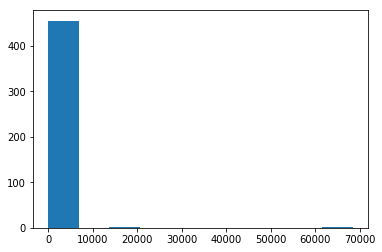

In [125]:
plt.hist(df.bnp)

Heavily skewed!

(array([  4.,  12.,  43.,  90., 120., 112.,  51.,  23.,   1.,   1.]),
 array([ 0.69314718,  1.73719205,  2.78123691,  3.82528178,  4.86932664,
         5.91337151,  6.95741637,  8.00146124,  9.0455061 , 10.08955097,
        11.13359583]),
 <a list of 10 Patch objects>)

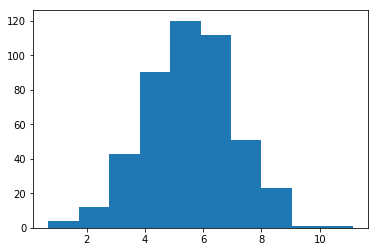

In [126]:
plt.hist(df.bnp.map(np.log))

log plot is much better! Box-Cox?

### this_bnp_change

In [127]:
df.this_bnp_change.isna().sum()

12

Few missing. Suggest imputing 0? Perhaps they only have one bnp measurement.

In [128]:
df.this_bnp_change.sort_values().head(10)

280   -66618.0
148    -2966.0
56     -2600.0
213    -1780.0
365    -1774.0
27     -1549.0
145    -1419.0
89     -1165.0
67     -1112.0
260    -1062.0
Name: this_bnp_change, dtype: float64

-66618 bnp change is a ludicrous outlier

In [129]:
df.this_bnp_change.sort_values(ascending = False).head(10)

57     2580.0
387    1704.0
311    1556.0
375    1510.0
429    1439.0
180    1433.0
39     1188.0
337    1175.0
152    1107.0
389    1021.0
Name: this_bnp_change, dtype: float64

2580 is an outlier, but perhaps not rediculous.

(array([  3.,   3.,   7.,  12.,  82., 220.,  20.,   7.,   4.,   5.]),
 array([-1780. , -1431.6, -1083.2,  -734.8,  -386.4,   -38. ,   310.4,
          658.8,  1007.2,  1355.6,  1704. ]),
 <a list of 10 Patch objects>)

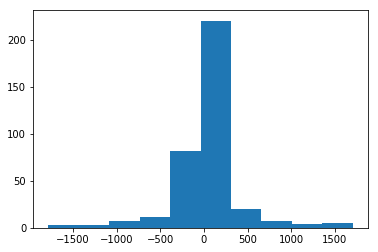

In [130]:
plt.hist(df.this_bnp_change.dropna()[(df.this_bnp_change > -2000)&(df.this_bnp_change != 0)&(df.this_bnp_change < 2000)])

## Meds

### Ace

In [131]:
df.ace.value_counts(dropna = False)

0.0    268
1.0    189
Name: ace, dtype: int64

### bb

In [132]:
df.bb.value_counts(dropna = False)

1.0    326
0.0    131
Name: bb, dtype: int64

### diuretics

In [133]:
df.diuretics.value_counts(dropna = False)

1.0    295
0.0    162
Name: diuretics, dtype: int64

### anticoagulant

In [134]:
df.anticoagulant.value_counts(dropna = False)

1.0    338
0.0    119
Name: anticoagulant, dtype: int64

### ionotropes

In [135]:
df.ionotropes.value_counts(dropna = False)

0.0    417
1.0     40
Name: ionotropes, dtype: int64

### other cardiac meds

In [136]:
df.other_cardiac_meds.value_counts(dropna = False)

NaN                                                                                                                                                                    177
Atorvastatin 40mg QD                                                                                                                                                    17
Atorvastatin 80mg QD                                                                                                                                                    14
Amlodipine 5mg QD                                                                                                                                                        8
Amlodipine 10mg QD                                                                                                                                                       7
Amiodarone 200mg QD                                                                                                                              

other cardiac meds column uncleaned?

## Labs

### bun

In [137]:
df.bun.isna().sum()

0

In [138]:
df.bun.describe()

count    457.000000
mean      35.787746
std       23.093081
min        0.000000
25%       19.000000
50%       29.000000
75%       46.000000
max      205.000000
Name: bun, dtype: float64

(array([136., 177.,  85.,  33.,  20.,   3.,   2.,   0.,   0.,   1.]),
 array([  0. ,  20.5,  41. ,  61.5,  82. , 102.5, 123. , 143.5, 164. ,
        184.5, 205. ]),
 <a list of 10 Patch objects>)

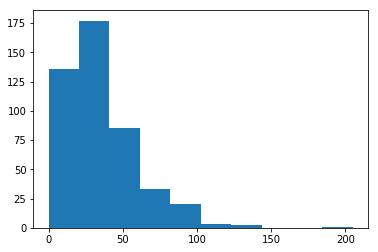

In [140]:
plt.hist(df.bun)

Skew.

In [145]:
df.bun.sort_values().head(5)

276    0
200    8
419    9
198    9
433    9
Name: bun, dtype: int64

Why the single 0 value? If imputed, I suggest changing the imputation to be the average.

(array([17., 35., 93., 86., 81., 75., 40., 25.,  3.,  1.]),
 array([2.07944154, 2.40379839, 2.72815523, 3.05251207, 3.37686892,
        3.70122576, 4.0255826 , 4.34993945, 4.67429629, 4.99865314,
        5.32300998]),
 <a list of 10 Patch objects>)

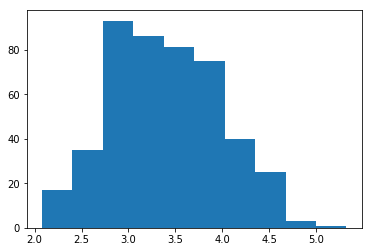

In [146]:
plt.hist((df.bun[df.bun > 0]).map(np.log))

Log plot is better. Box-Cox?

### cr

In [147]:
df.cr.describe()

count    457.00000
mean       1.65860
std        1.50674
min        0.00000
25%        0.80000
50%        1.10000
75%        1.70000
max        9.10000
Name: cr, dtype: float64

(array([155., 201.,  35.,  20.,  19.,   9.,   6.,   4.,   3.,   5.]),
 array([0.  , 0.91, 1.82, 2.73, 3.64, 4.55, 5.46, 6.37, 7.28, 8.19, 9.1 ]),
 <a list of 10 Patch objects>)

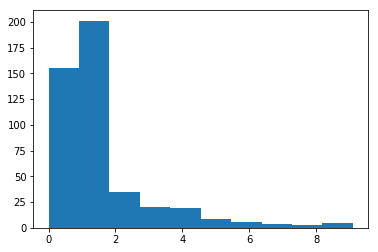

In [148]:
plt.hist(df.cr)

Skew!

In [150]:
df.cr.sort_values().head(5)

276    0.0
113    0.3
261    0.3
309    0.3
354    0.4
Name: cr, dtype: float64

Why the single 0 value? If imputed, suggest changing to mean imputation.

(array([  8.,  16.,  94., 119.,  97.,  41.,  33.,  21.,  15.,  12.]),
 array([-1.2039728 , -0.86274808, -0.52152336, -0.18029864,  0.16092608,
         0.5021508 ,  0.84337553,  1.18460025,  1.52582497,  1.86704969,
         2.20827441]),
 <a list of 10 Patch objects>)

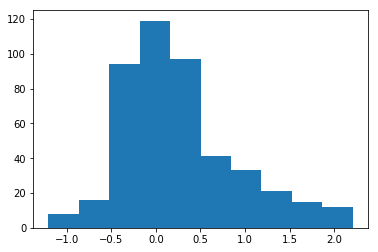

In [151]:
plt.hist((df.cr[df.cr > 0]).map(np.log))

Log plot is better but still seems a bit skewed. Box-Cox?

### sodium

In [152]:
df.sodium.describe()

count    192.000000
mean     140.296875
std        4.706061
min      120.000000
25%      138.000000
50%      140.000000
75%      142.250000
max      164.000000
Name: sodium, dtype: float64

In [153]:
df.sodium.isna().sum()

265

Loads of missing! How to impute?

(array([ 1.,  1.,  6., 36., 82., 50., 11.,  3.,  1.,  1.]),
 array([120. , 124.4, 128.8, 133.2, 137.6, 142. , 146.4, 150.8, 155.2,
        159.6, 164. ]),
 <a list of 10 Patch objects>)

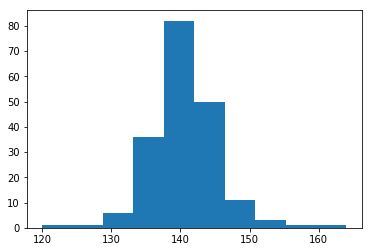

In [154]:
plt.hist(df.sodium.dropna())

Not bad.

### potasium

In [155]:
df.potasium.describe()

count    456.000000
mean       4.481360
std        1.072013
min        0.000000
25%        4.000000
50%        4.400000
75%        4.900000
max       22.300000
Name: potasium, dtype: float64

In [156]:
df.potasium.isna().sum()

1

Impute single missing value with mean?

(array([  2., 228., 223.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  2.23,  4.46,  6.69,  8.92, 11.15, 13.38, 15.61, 17.84,
        20.07, 22.3 ]),
 <a list of 10 Patch objects>)

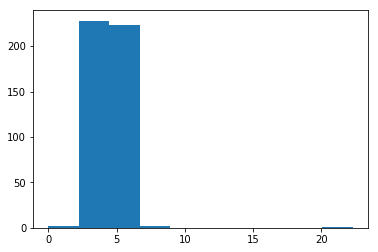

In [157]:
plt.hist(df.potasium.dropna())

Potential outlier

In [158]:
df.potasium.sort_values().head(5)

276    0.0
397    2.0
443    2.4
445    2.8
275    3.0
Name: potasium, dtype: float64

Single 0 value. Error? If imputed, suggest mean imputation.

In [159]:
df.potasium.sort_values().tail(5)

394     6.2
37      7.3
421     7.5
340    22.3
250     NaN
Name: potasium, dtype: float64

22.3 L value seems like crazy outlier? Treat as 2.3? Treat as missing?

(array([  2.,   3.,  35., 107., 171., 101.,  30.,   3.,   0.,   2.]),
 array([2.  , 2.55, 3.1 , 3.65, 4.2 , 4.75, 5.3 , 5.85, 6.4 , 6.95, 7.5 ]),
 <a list of 10 Patch objects>)

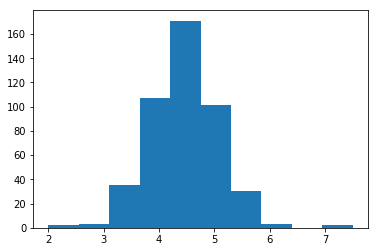

In [161]:
plt.hist(df.potasium[(df.potasium < 20)&(df.potasium > 0)].dropna())

Looks OK with 0 and outlier removed.

### mg

In [162]:
df.mg.isna().sum()

48

A lot of missing!

(array([  6.,   0.,   8.,  22., 130., 161.,  51.,  15.,   8.,   8.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

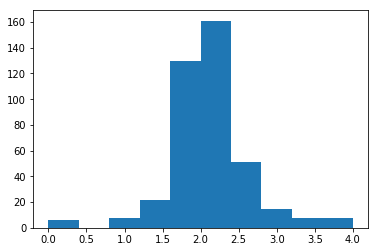

In [163]:
plt.hist(df.mg.dropna())

Not a bad plot

In [164]:
(df.mg == 0).sum()

6

Are these 0 values errors? Change to mean? There's a lot of missing already...

### this_cr_change

In [165]:
df.this_cr_change.isna().sum()

32

Significant missing values. Is there only a single cr measurement? If so impute 0?

(array([  1.,   2.,   3.,  11.,  45., 205., 123.,  23.,   3.,   9.]),
 array([-133.33 , -109.997,  -86.664,  -63.331,  -39.998,  -16.665,
           6.668,   30.001,   53.334,   76.667,  100.   ]),
 <a list of 10 Patch objects>)

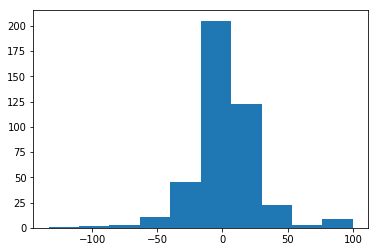

In [167]:
plt.hist(df.this_cr_change.dropna())

Looks OK.

<p><a name="pacemaker"></a></p>
## Pacemaker (aicd)

In [168]:
df.aicd.value_counts(dropna = False)

0.0    415
1.0     42
Name: aicd, dtype: int64

<p><a name="duration"></a></p>
## Duration

In [169]:
df.duration.describe()

count     438.000000
mean       50.417808
std       340.012359
min     -3638.000000
25%        22.250000
50%        47.000000
75%        91.250000
max      1390.000000
Name: duration, dtype: float64

In [170]:
df.duration.sort_values().head(21)

433   -3638.0
405   -2628.0
269   -1783.0
152   -1395.0
195   -1393.0
189   -1045.0
210   -1028.0
199   -1024.0
371    -997.0
235    -709.0
449    -708.0
126    -705.0
202    -696.0
26     -691.0
191    -657.0
72     -638.0
76     -334.0
102    -312.0
216    -307.0
268    -298.0
149    -277.0
Name: duration, dtype: float64

Why all the negative durations?

In [171]:
df.duration.isna().sum()

19

20 missing durations.

In [172]:
df.duration[df.duration >= 0].describe()

count     413.000000
mean      105.772397
std       169.033536
min         0.000000
25%        26.000000
50%        50.000000
75%        95.000000
max      1390.000000
Name: duration, dtype: float64

(array([342.,  27.,  22.,  10.,   3.,   5.,   2.,   0.,   0.,   2.]),
 array([   0.,  139.,  278.,  417.,  556.,  695.,  834.,  973., 1112.,
        1251., 1390.]),
 <a list of 10 Patch objects>)

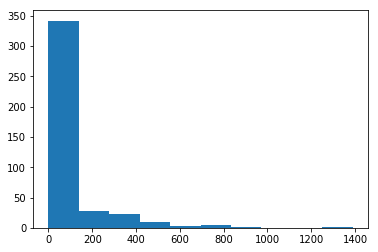

In [173]:
plt.hist(df.duration[(df.duration > -1 )])

Plot is heavily skewed.

(array([  4.,   7.,  13.,  36.,  85., 121.,  69.,  35.,  22.,  10.]),
 array([0.        , 0.7237059 , 1.44741181, 2.17111771, 2.89482361,
        3.61852951, 4.34223542, 5.06594132, 5.78964722, 6.51335312,
        7.23705903]),
 <a list of 10 Patch objects>)

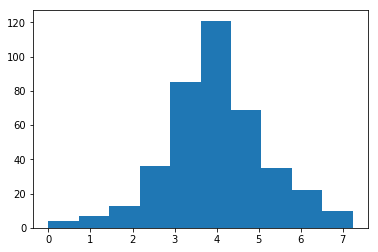

In [176]:
plt.hist(df.duration[df.duration > 0].map(np.log))

Log histogram of non-missing values looks much more normal. Box-Cox transformation may be appropriate here.